In [99]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

from sklearn.model_selection import KFold 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

%matplotlib inline

In [100]:
file_path = 'C:/Users/bhara/Downloads/Airline project/train.csv'
df = pd.read_csv(file_path)
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [101]:
df.shape

(103904, 25)

In [102]:
df = df.drop(df.iloc[:,[0, 1]], axis = 1)

In [103]:
categorical_indexes = [0, 1, 3, 4] + list(range(6, 20))
df.iloc[:,categorical_indexes] = df.iloc[:,categorical_indexes].astype('category')

C:\Users\bhara\AppData\Local\Temp\ipykernel_35460\4173762006.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,categorical_indexes] = df.iloc[:,categorical_indexes].astype('category')


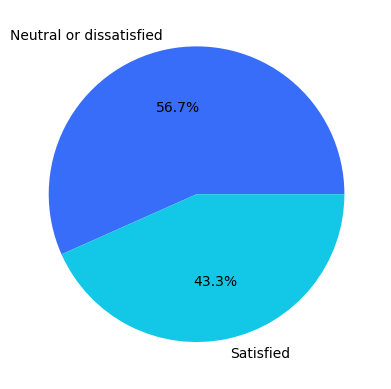

In [104]:
plt.pie(df.satisfaction.value_counts(), labels = ["Neutral or dissatisfied", "Satisfied"], colors = sns.color_palette('rainbow'), autopct = '%1.1f%%')
pass

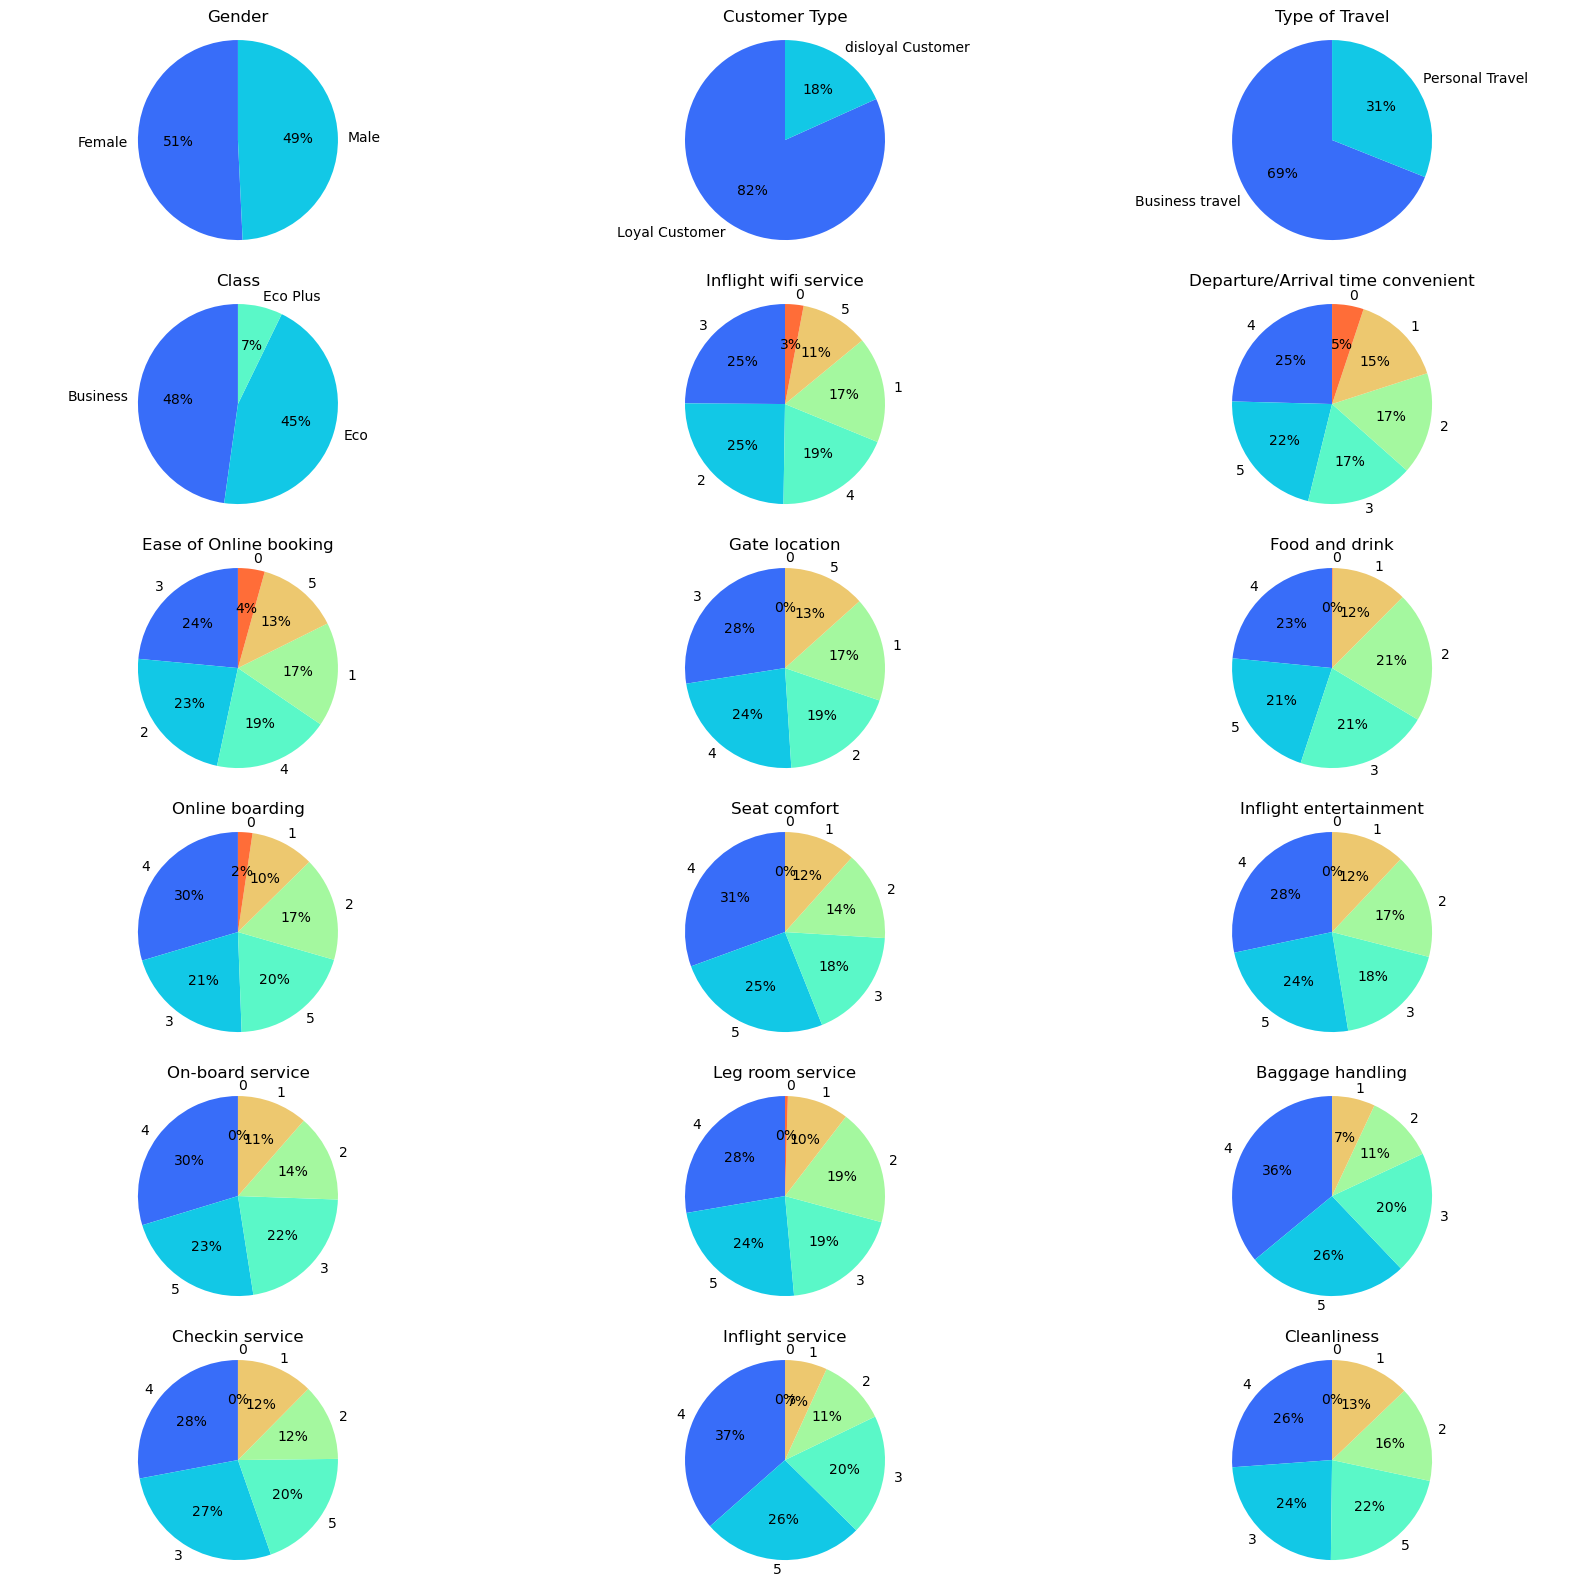

In [105]:
categ = df.iloc[:,categorical_indexes]
fig, axes = plt.subplots(6, 3, figsize = (20, 20))
for i, col in enumerate(categ):
    column_values = df[col].value_counts()
    labels = column_values.index
    sizes = column_values.values
    axes[i//3, i%3].pie(sizes, labels = labels, colors = sns.color_palette('rainbow'), autopct = '%1.0f%%', startangle = 90)
    axes[i//3, i%3].axis('equal')
    axes[i//3, i%3].set_title(col)
plt.show()

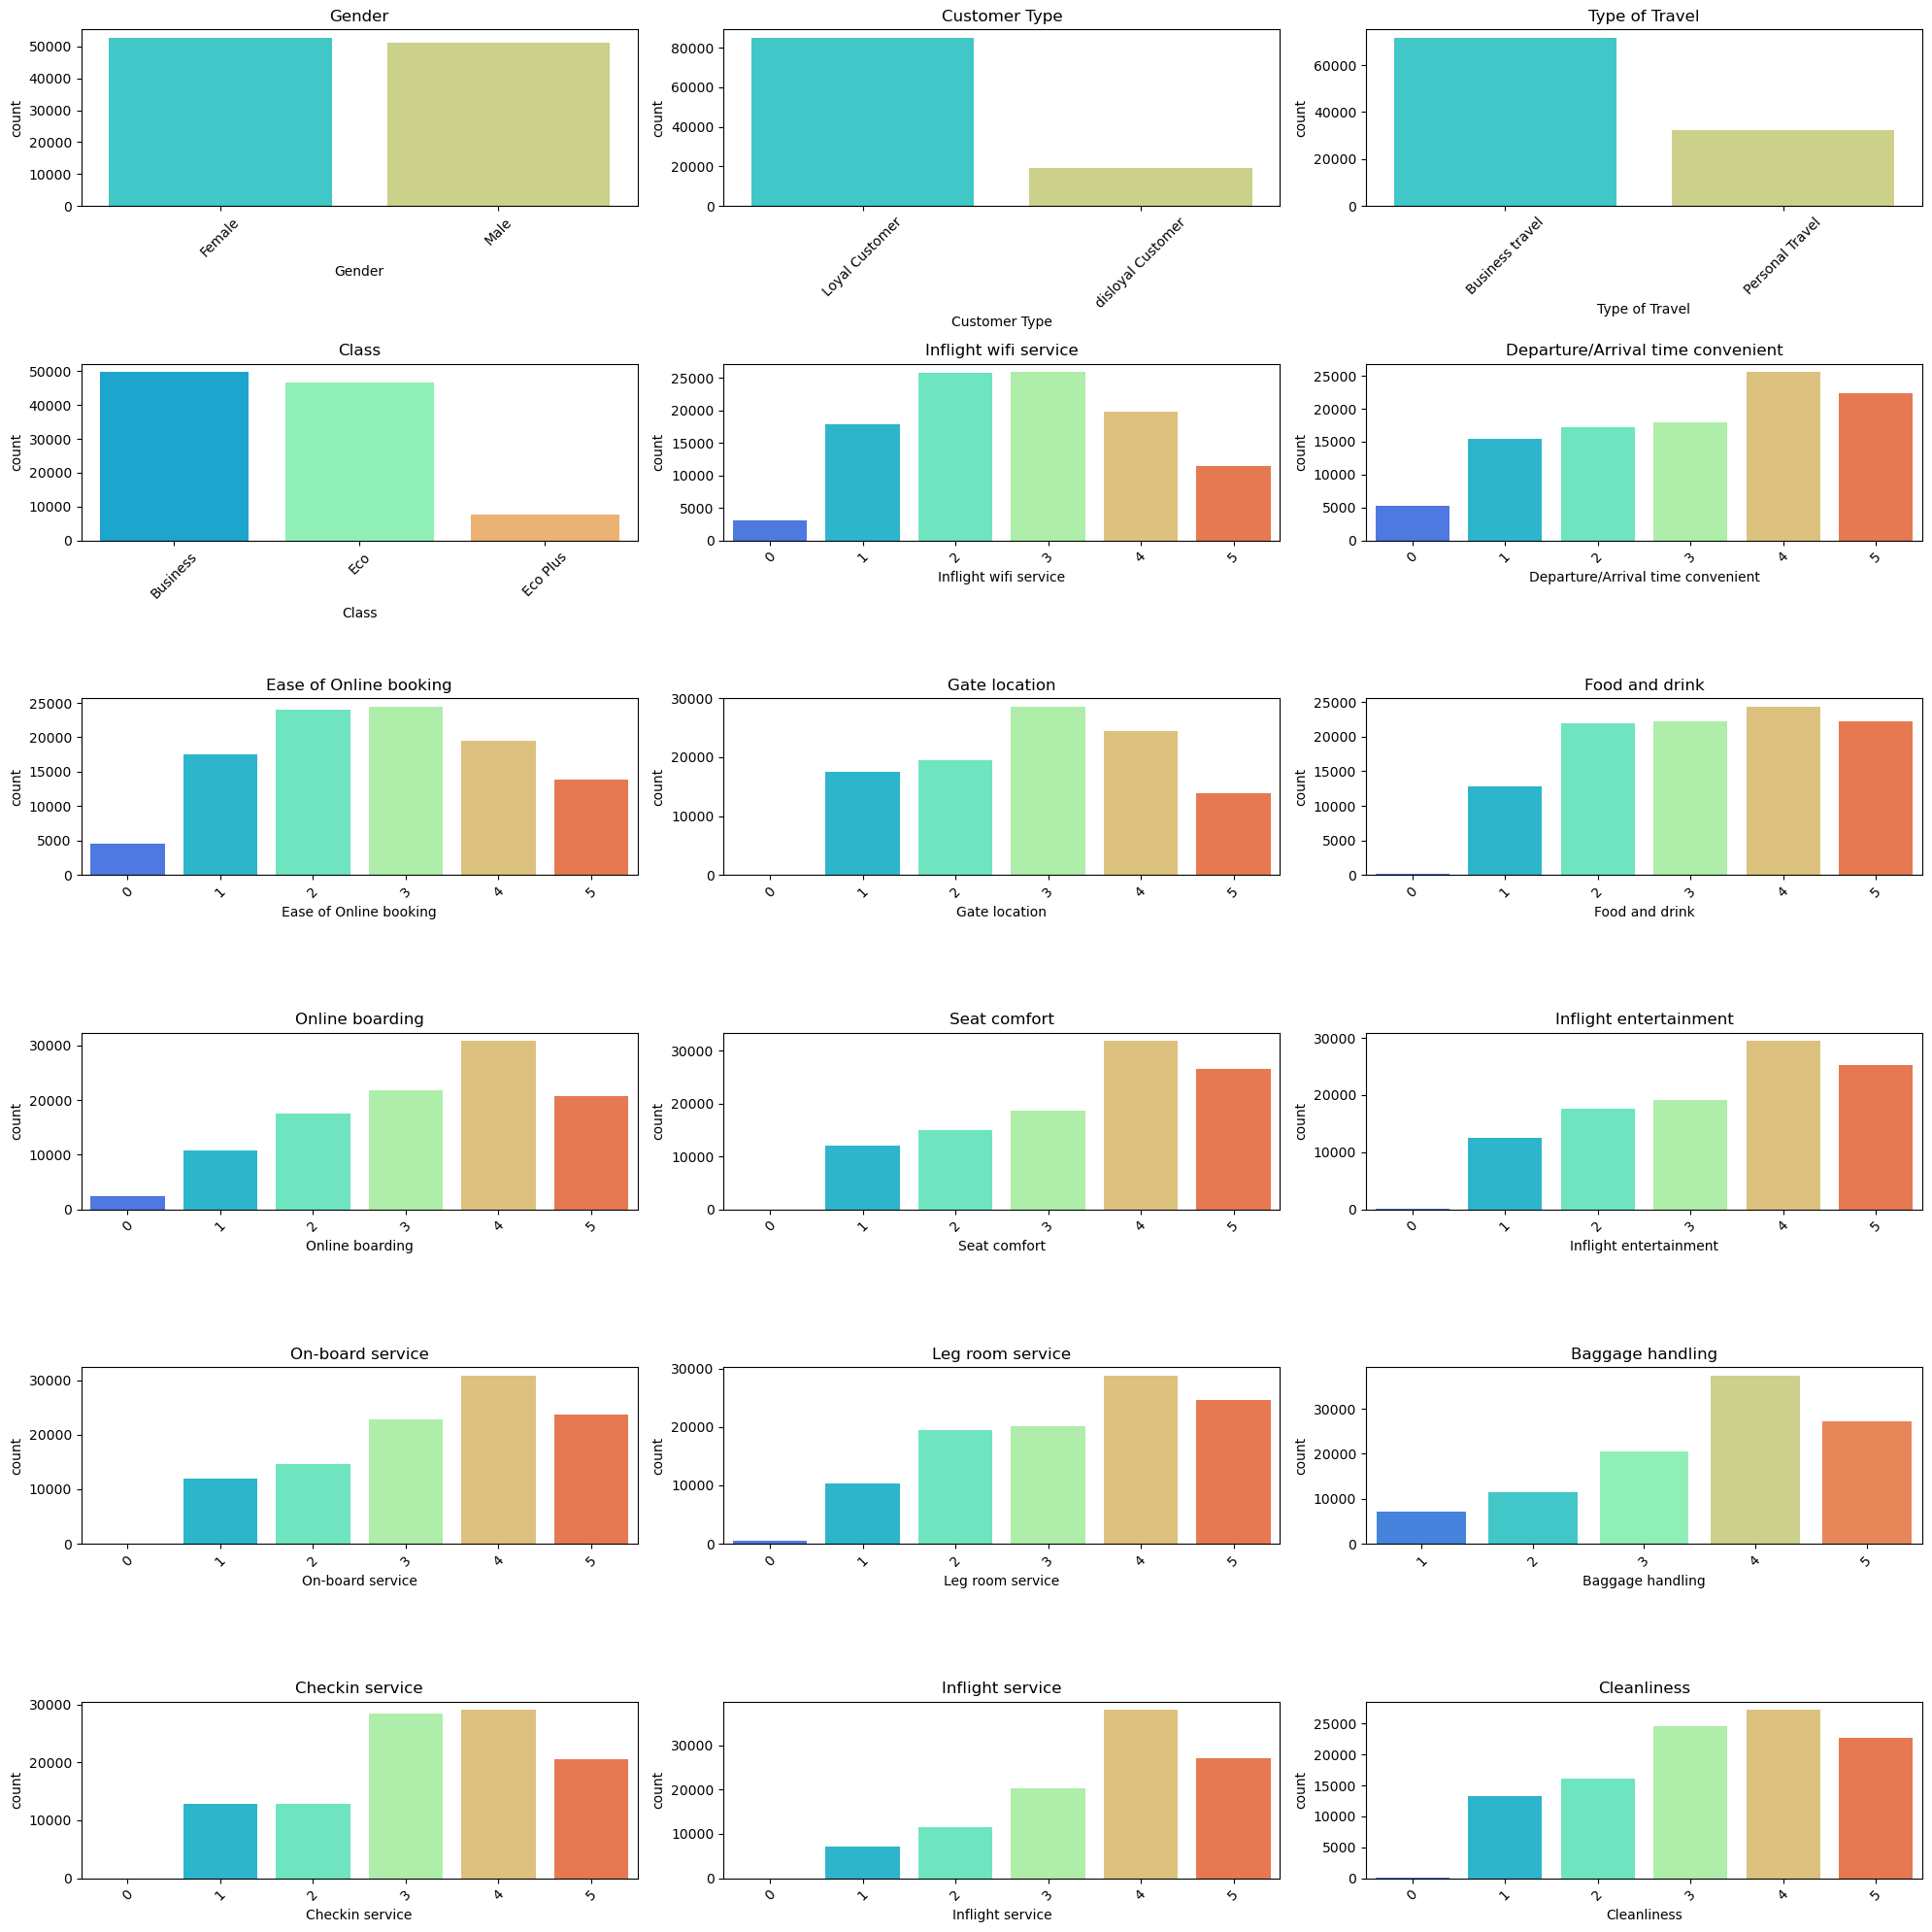

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and 'categorical_indexes' contains the indices of categorical columns

# Create subplots
num_rows = len(categorical_indexes) // 3 + (len(categorical_indexes) % 3 > 0)  # Calculate the number of rows needed
fig, axes = plt.subplots(num_rows, 3, figsize=(20, 20))

# Iterate through categorical columns
for i, col_index in enumerate(categorical_indexes):
    row = i // 3
    col = i % 3
    col_name = df.columns[col_index]
    
    # Create a countplot
    sns.countplot(data=df, x=col_name, ax=axes[row, col], palette='rainbow')
    axes[row, col].set_title(col_name)
    
    # Rotate x-axis labels for better readability if needed
    axes[row, col].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [79]:
classification_column = df['satisfaction']

# Find unique values
unique_values = classification_column.unique()
print("Unique Values:", unique_values)

# Find the shape (number of rows and columns)
shape = classification_column.shape
print("Shape:", shape)

Unique Values: ['neutral or dissatisfied' 'satisfied']
Shape: (103904,)


In [80]:
classification_column = df['Class']

# Find unique values
unique_values = classification_column.unique()
print("Unique Values:", unique_values)

# Find the shape (number of rows and columns)
shape = classification_column.shape
print("Shape:", shape)

Unique Values: ['Eco Plus' 'Business' 'Eco']
Shape: (103904,)


In [81]:
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [82]:
df = pd.get_dummies(df, columns = ['satisfaction','Gender', 'Customer Type','Type of Travel','Class',], drop_first = True)
df.head()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction_satisfied,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,0,70172,13,460,3,4,3,1,5,3,...,5,5,25,18.0,0,1,0,1,0,1
1,1,5047,25,235,3,2,3,3,1,3,...,4,1,1,6.0,0,1,1,0,0,0
2,2,110028,26,1142,2,2,2,2,5,5,...,4,5,0,0.0,1,0,0,0,0,0
3,3,24026,25,562,2,5,5,5,2,2,...,4,2,11,9.0,0,0,0,0,0,0
4,4,119299,61,214,3,3,3,3,4,5,...,3,3,0,0.0,1,1,0,0,0,0


In [83]:
df.isnull().sum()

Unnamed: 0                             0
id                                     0
Age                                    0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction_satisfied                 0
Gender_Male                            0
Customer Type_disloyal Customer        0
Type of Travel_Personal Travel         0
Class_Eco       

In [84]:
df['Arrival Delay in Minutes'].fillna(0, inplace= True)

In [85]:
df.isnull().sum()

Unnamed: 0                           0
id                                   0
Age                                  0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction_satisfied               0
Gender_Male                          0
Customer Type_disloyal Customer      0
Type of Travel_Personal Travel       0
Class_Eco                            0
Class_Eco Plus           

In [86]:
#df = df.drop('Unnamed: 0', axis = 1, inplace = True)

In [87]:
df.head()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction_satisfied,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,0,70172,13,460,3,4,3,1,5,3,...,5,5,25,18.0,0,1,0,1,0,1
1,1,5047,25,235,3,2,3,3,1,3,...,4,1,1,6.0,0,1,1,0,0,0
2,2,110028,26,1142,2,2,2,2,5,5,...,4,5,0,0.0,1,0,0,0,0,0
3,3,24026,25,562,2,5,5,5,2,2,...,4,2,11,9.0,0,0,0,0,0,0
4,4,119299,61,214,3,3,3,3,4,5,...,3,3,0,0.0,1,1,0,0,0,0


In [88]:
coorelation_matrix = df.corr()


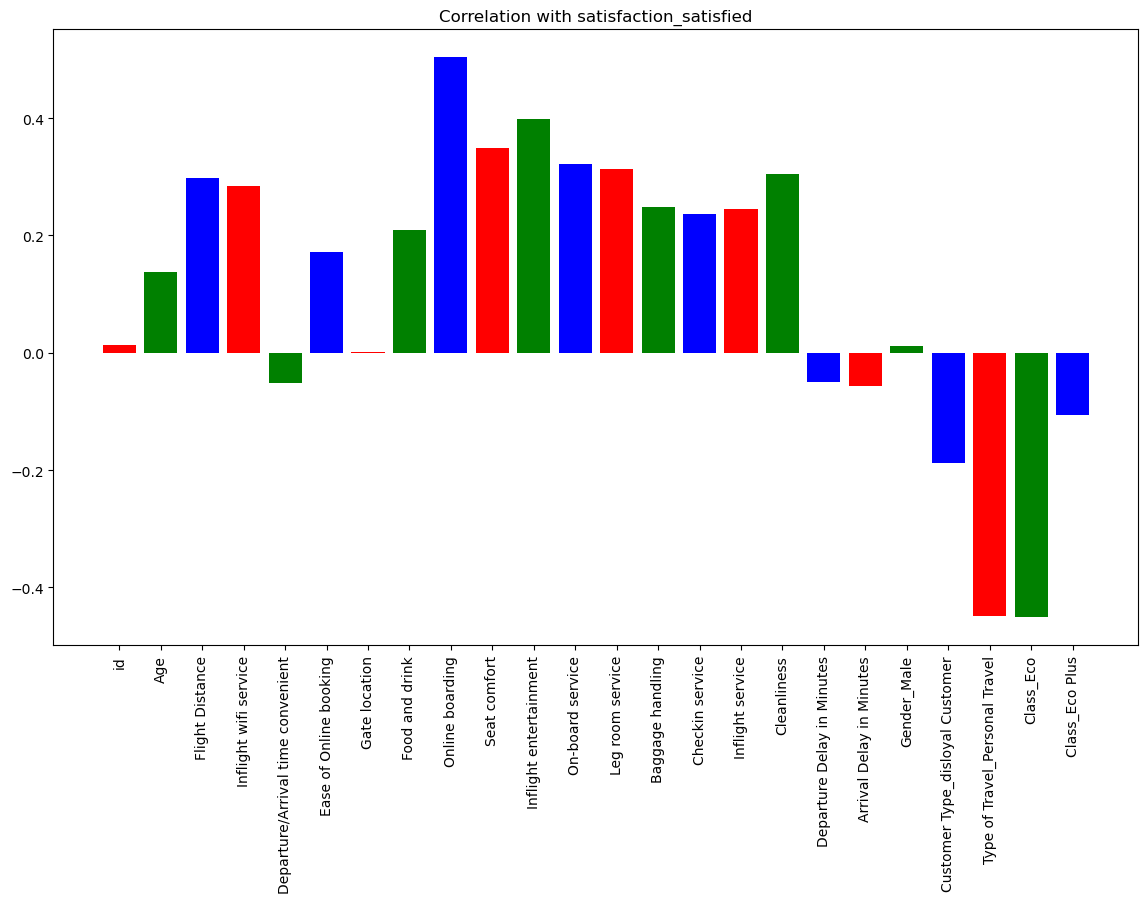

In [89]:
coorelation_matrix = coorelation_matrix.drop(index=['satisfaction_satisfied', 'Unnamed: 0'])
coorelation_matrix=coorelation_matrix['satisfaction_satisfied']
coorelation_matrix
# Define a list of colors for each bar
bar_colors = ['red', 'green', 'blue']

plt.figure(figsize = (14, 8))
plt.bar(coorelation_matrix.index, coorelation_matrix.values, color = bar_colors)
plt. xticks(rotation = 90)
plt.title('Correlation with satisfaction_satisfied')
plt.show()

In [90]:
coorelation_matrix = df.corr()

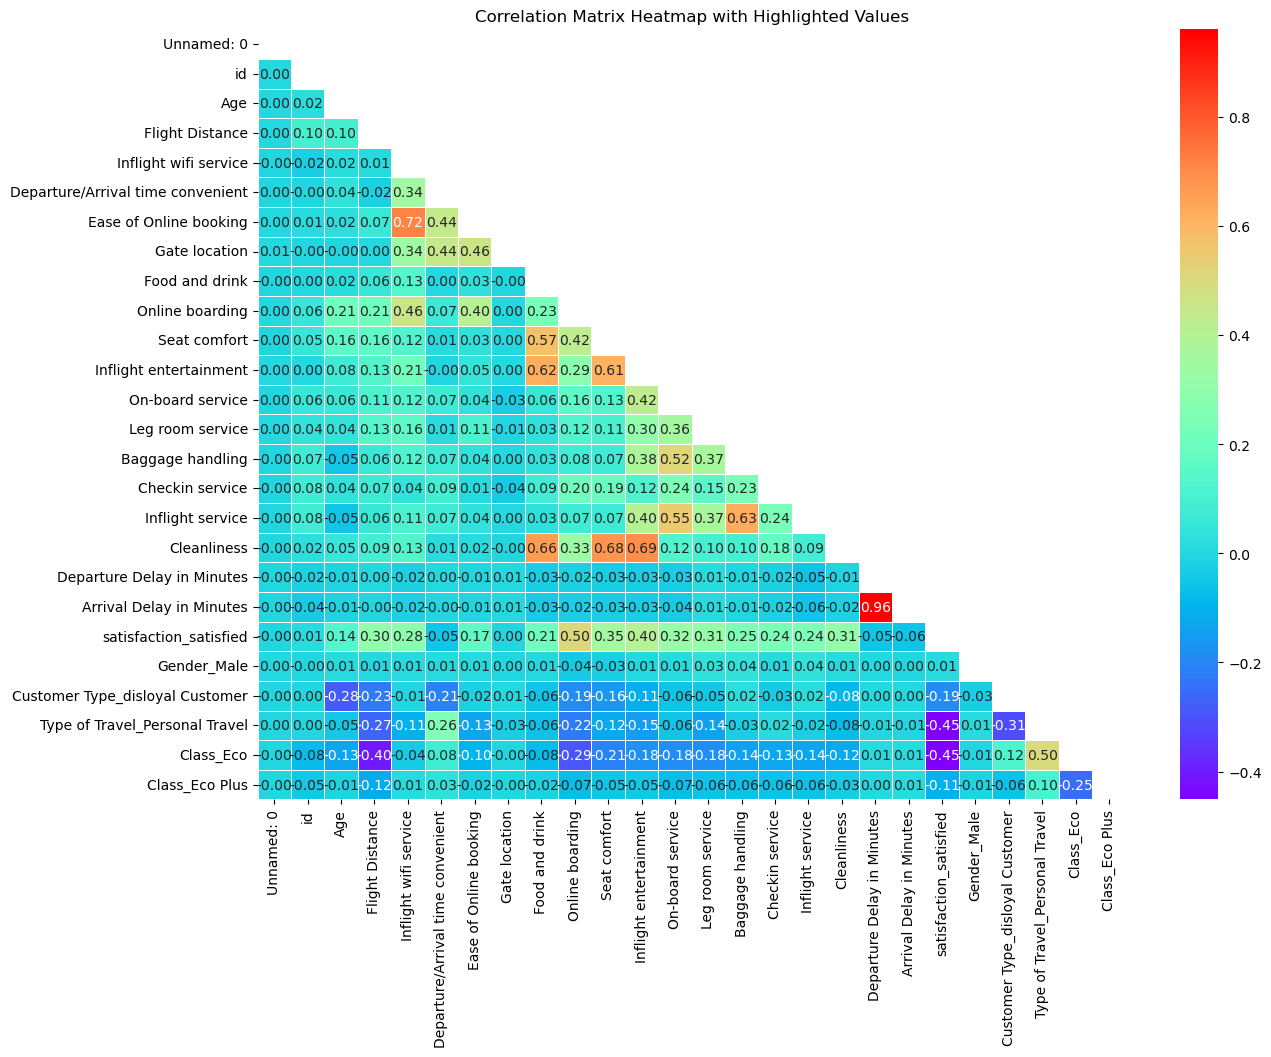

In [91]:
# Create a heatmap for the correlation matrix using Seaborn
plt.figure(figsize=(14, 10))  # Optional: Set the size of the heatmap
# Highlight specific values by modifying the color map (cmap)
cmap = sns.color_palette('rainbow', as_cmap=True)  # Define a custom color map

# Mask values that you want to hide (optional)
mask = np.zeros_like(coorelation_matrix)  # Create an array of zeros with the same shape
mask[np.triu_indices_from(mask)] = True  # Mask the upper triangle of the matrix

# Create the heatmap with the specified cmap and mask
sns.heatmap(coorelation_matrix, annot=True, cmap=cmap, fmt=".2f", linewidths=0.5, mask=mask)

# Add a title
plt.title("Correlation Matrix Heatmap with Highlighted Values")

# Show the heatmap
plt.show()

In [92]:

# from sklearn.model_selection import cross_val_score
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.feature_selection import SelectKBest, f_classif

predictor_columns = df.drop(['satisfaction_satisfied','Unnamed: 0', 'id'], axis= 1)
y= df['satisfaction_satisfied'].values.reshape(-1,1)
X = predictor_columns



In [93]:
print(X.shape)
print(y.shape)

(103904, 23)
(103904, 1)


In [95]:
model = LogisticRegression()
model.fit(X, y)
model.score(X, y)

C:\Users\bhara\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bhara\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8100650600554358

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
## Flag intermediate output

#show_steps = True   # for testing/debugging
show_steps = False  # without showing steps

In [71]:


## Use Forward Feature Selection to pick a good model

# start with no predictors
included = []
# keep track of model and parameters
best = {'feature': '', 'r2': 0, 'a_r2': 0}
# create a model object to hold the modelling parameters
model = RandomForestClassifier(n_estimators=100, random_state=42)
# get the number of cases in the training data
n = X_train.shape[0]
fit = model.fit(X_train, y_train) # fit a model; consider which predictors should be included
r2_list = []
adjusted_r2_list = []
while True:
    changed = False
    if show_steps:
        print('') 

    # list the features to be evaluated
    excluded = list(set(X.columns) - set(included))
    
    if show_steps:
        print('(Step) Excluded = %s' % ', '.join(excluded))  

    # for each remaining feature to be evaluated
    for new_column in excluded:
        
        if show_steps:
            print('(Step) Trying %s...' % new_column)
            print('(Step) - Features = %s' % ', '.join(included + [new_column]))

        # fit the model with the Training data
        fit = model.fit(X_train[included + [new_column]], y_train) # fit a model; consider which predictors should be included
        # calculate the score (R^2 for Regression)
        r2 = model.score(X_test[included + [new_column]], y_test) # calculate the score
        # number of predictors in this model
        k = len(included) + 1
        # calculate the adjusted R^2
        adjusted_r2 = 1 - ((1-r2)*(n-1)/(n-k-1)) # calculate the Adjusted R^2
        
        
        

        if show_steps:
                print('(Step) - Adjusted R^2: This = %.3f; Best = %.3f' % 
                      (adjusted_r2, best['a_r2']))

            # if model improves
        if adjusted_r2 > best['a_r2']:
                # record new parameters
                best = {'feature': new_column, 'r2': r2, 'a_r2': adjusted_r2}
                # flag that found a better model
                changed = True
                if show_steps:
                    print('(Step) - New Best!   : Feature = %s; R^2 = %.3f; Adjusted R^2 = %.3f' % 
                          (best['feature'], best['r2'], best['a_r2']))
    # END for

    # if found a better model after testing all remaining features
    if changed:
        # update control details
        included.append(best['feature'])
        excluded = list(set(excluded) - set(best['feature']))
        print('Added feature %-4s with R^2 = %.3f and adjusted R^2 = %.3f' % 
              (best['feature'], best['r2'], best['a_r2']))
        r2_list.append(r2)
        adjusted_r2_list.append(adjusted_r2)
    else:
        # terminate if no better model
        break

print('')
print('Resulting features:')
print(', '.join(included))

C:\Users\bhara\AppData\Local\Temp\ipykernel_35460\2004605409.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  fit = model.fit(X_train, y_train) # fit a model; consider which predictors should be included
C:\Users\bhara\AppData\Local\Temp\ipykernel_35460\2004605409.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  fit = model.fit(X_train[included + [new_column]], y_train) # fit a model; consider which predictors should be included
C:\Users\bhara\AppData\Local\Temp\ipykernel_35460\2004605409.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  fit = model.fit(X_train[included + [new_column]], y_train) # fit a model; consider which predictors should be in

Added feature Online boarding with R^2 = 0.789 and adjusted R^2 = 0.789


C:\Users\bhara\AppData\Local\Temp\ipykernel_35460\2004605409.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  fit = model.fit(X_train[included + [new_column]], y_train) # fit a model; consider which predictors should be included
C:\Users\bhara\AppData\Local\Temp\ipykernel_35460\2004605409.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  fit = model.fit(X_train[included + [new_column]], y_train) # fit a model; consider which predictors should be included
C:\Users\bhara\AppData\Local\Temp\ipykernel_35460\2004605409.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  fit = model.fit(X_train[included + [new_column]], y_train) # fit a model; consider whic

Added feature Type of Travel_Personal Travel with R^2 = 0.850 and adjusted R^2 = 0.850


C:\Users\bhara\AppData\Local\Temp\ipykernel_35460\2004605409.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  fit = model.fit(X_train[included + [new_column]], y_train) # fit a model; consider which predictors should be included
C:\Users\bhara\AppData\Local\Temp\ipykernel_35460\2004605409.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  fit = model.fit(X_train[included + [new_column]], y_train) # fit a model; consider which predictors should be included
C:\Users\bhara\AppData\Local\Temp\ipykernel_35460\2004605409.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  fit = model.fit(X_train[included + [new_column]], y_train) # fit a model; consider whic

Added feature Inflight wifi service with R^2 = 0.891 and adjusted R^2 = 0.891


C:\Users\bhara\AppData\Local\Temp\ipykernel_35460\2004605409.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  fit = model.fit(X_train[included + [new_column]], y_train) # fit a model; consider which predictors should be included
C:\Users\bhara\AppData\Local\Temp\ipykernel_35460\2004605409.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  fit = model.fit(X_train[included + [new_column]], y_train) # fit a model; consider which predictors should be included
C:\Users\bhara\AppData\Local\Temp\ipykernel_35460\2004605409.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  fit = model.fit(X_train[included + [new_column]], y_train) # fit a model; consider whic

Added feature Gate location with R^2 = 0.922 and adjusted R^2 = 0.922


C:\Users\bhara\AppData\Local\Temp\ipykernel_35460\2004605409.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  fit = model.fit(X_train[included + [new_column]], y_train) # fit a model; consider which predictors should be included
C:\Users\bhara\AppData\Local\Temp\ipykernel_35460\2004605409.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  fit = model.fit(X_train[included + [new_column]], y_train) # fit a model; consider which predictors should be included
C:\Users\bhara\AppData\Local\Temp\ipykernel_35460\2004605409.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  fit = model.fit(X_train[included + [new_column]], y_train) # fit a model; consider whic

Added feature Inflight service with R^2 = 0.930 and adjusted R^2 = 0.930


C:\Users\bhara\AppData\Local\Temp\ipykernel_35460\2004605409.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  fit = model.fit(X_train[included + [new_column]], y_train) # fit a model; consider which predictors should be included
C:\Users\bhara\AppData\Local\Temp\ipykernel_35460\2004605409.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  fit = model.fit(X_train[included + [new_column]], y_train) # fit a model; consider which predictors should be included
C:\Users\bhara\AppData\Local\Temp\ipykernel_35460\2004605409.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  fit = model.fit(X_train[included + [new_column]], y_train) # fit a model; consider whic

Added feature Customer Type_disloyal Customer with R^2 = 0.942 and adjusted R^2 = 0.942


C:\Users\bhara\AppData\Local\Temp\ipykernel_35460\2004605409.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  fit = model.fit(X_train[included + [new_column]], y_train) # fit a model; consider which predictors should be included
C:\Users\bhara\AppData\Local\Temp\ipykernel_35460\2004605409.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  fit = model.fit(X_train[included + [new_column]], y_train) # fit a model; consider which predictors should be included
C:\Users\bhara\AppData\Local\Temp\ipykernel_35460\2004605409.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  fit = model.fit(X_train[included + [new_column]], y_train) # fit a model; consider whic

Added feature Baggage handling with R^2 = 0.949 and adjusted R^2 = 0.949


C:\Users\bhara\AppData\Local\Temp\ipykernel_35460\2004605409.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  fit = model.fit(X_train[included + [new_column]], y_train) # fit a model; consider which predictors should be included
C:\Users\bhara\AppData\Local\Temp\ipykernel_35460\2004605409.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  fit = model.fit(X_train[included + [new_column]], y_train) # fit a model; consider which predictors should be included
C:\Users\bhara\AppData\Local\Temp\ipykernel_35460\2004605409.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  fit = model.fit(X_train[included + [new_column]], y_train) # fit a model; consider whic

Added feature Checkin service with R^2 = 0.952 and adjusted R^2 = 0.952


C:\Users\bhara\AppData\Local\Temp\ipykernel_35460\2004605409.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  fit = model.fit(X_train[included + [new_column]], y_train) # fit a model; consider which predictors should be included
C:\Users\bhara\AppData\Local\Temp\ipykernel_35460\2004605409.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  fit = model.fit(X_train[included + [new_column]], y_train) # fit a model; consider which predictors should be included
C:\Users\bhara\AppData\Local\Temp\ipykernel_35460\2004605409.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  fit = model.fit(X_train[included + [new_column]], y_train) # fit a model; consider whic

Added feature Class_Eco with R^2 = 0.954 and adjusted R^2 = 0.954


C:\Users\bhara\AppData\Local\Temp\ipykernel_35460\2004605409.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  fit = model.fit(X_train[included + [new_column]], y_train) # fit a model; consider which predictors should be included
C:\Users\bhara\AppData\Local\Temp\ipykernel_35460\2004605409.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  fit = model.fit(X_train[included + [new_column]], y_train) # fit a model; consider which predictors should be included
C:\Users\bhara\AppData\Local\Temp\ipykernel_35460\2004605409.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  fit = model.fit(X_train[included + [new_column]], y_train) # fit a model; consider whic

Added feature Class_Eco Plus with R^2 = 0.955 and adjusted R^2 = 0.955


C:\Users\bhara\AppData\Local\Temp\ipykernel_35460\2004605409.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  fit = model.fit(X_train[included + [new_column]], y_train) # fit a model; consider which predictors should be included
C:\Users\bhara\AppData\Local\Temp\ipykernel_35460\2004605409.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  fit = model.fit(X_train[included + [new_column]], y_train) # fit a model; consider which predictors should be included
C:\Users\bhara\AppData\Local\Temp\ipykernel_35460\2004605409.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  fit = model.fit(X_train[included + [new_column]], y_train) # fit a model; consider whic


Resulting features:
Online boarding, Type of Travel_Personal Travel, Inflight wifi service, Gate location, Inflight service, Customer Type_disloyal Customer, Baggage handling, Checkin service, Class_Eco, Class_Eco Plus


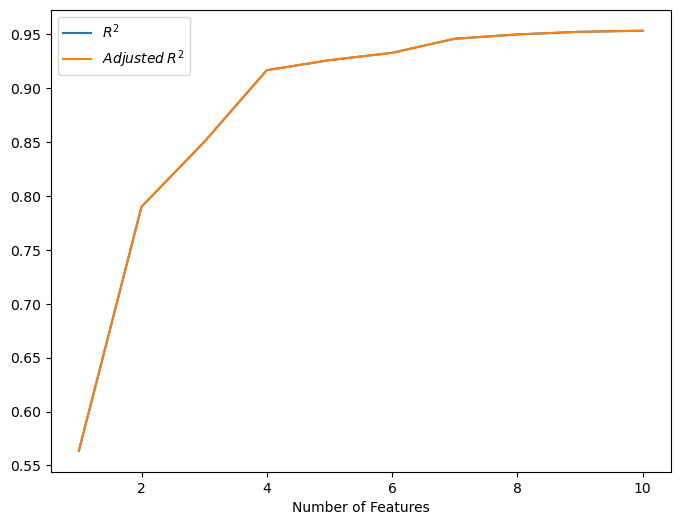

In [72]:
## Chart both R^2 and Adjusted R^2

_range = range(1, len(r2_list)+1)

# define chart size
plt.figure(figsize = (8, 6))
# plot each metric 
plt.plot(_range, r2_list, label = '$R^2$')
plt.plot(_range, adjusted_r2_list, label = '$Adjusted \: R^2$')
# add some better visualisation
plt.xlabel('Number of Features')
plt.legend()
# output the chart
plt.show()

In [69]:
## Use Forward Feature Selection to pick a good model

# start with no predictors
included = []
# keep track of model and parameters
best = {'feature': '', 'r2': 0, 'a_r2': 0}
# create a model object to hold the modelling parameters
model = LogisticRegression() 
# get the number of cases in the training data
n = X_train.shape[0]
fit = model.fit(X_train, y_train) # fit a model; consider which predictors should be included
r2_list1 = []
adjusted_r2_list1 = []
while True:
    changed = False
    if show_steps:
        print('') 

    # list the features to be evaluated
    excluded = list(set(X.columns) - set(included))
    
    if show_steps:
        print('(Step) Excluded = %s' % ', '.join(excluded))  

    # for each remaining feature to be evaluated
    for new_column in excluded:
        
        if show_steps:
            print('(Step) Trying %s...' % new_column)
            print('(Step) - Features = %s' % ', '.join(included + [new_column]))

        # fit the model with the Training data
        fit = model.fit(X_train[included + [new_column]], y_train) # fit a model; consider which predictors should be included
        # calculate the score (R^2 for Regression)
        r2 = model.score(X_test[included + [new_column]], y_test) # calculate the score
        # number of predictors in this model
        k = len(included) + 1
        # calculate the adjusted R^2
        adjusted_r2 = 1 - ((1-r2)*(n-1)/(n-k-1)) # calculate the Adjusted R^2
        
       

        if show_steps:
                print('(Step) - Adjusted R^2: This = %.3f; Best = %.3f' % 
                      (adjusted_r2, best['a_r2']))

            # if model improves
        if adjusted_r2 > best['a_r2']:
                # record new parameters
                best = {'feature': new_column, 'r2': r2, 'a_r2': adjusted_r2}
                # flag that found a better model
                changed = True
                if show_steps:
                    print('(Step) - New Best!   : Feature = %s; R^2 = %.3f; Adjusted R^2 = %.3f' % 
                          (best['feature'], best['r2'], best['a_r2']))
    # END for

    # if found a better model after testing all remaining features
    if changed:
        # update control details
        included.append(best['feature'])
        excluded = list(set(excluded) - set(best['feature']))
        print('Added feature %-4s with R^2 = %.3f and adjusted R^2 = %.3f' % 
              (best['feature'], best['r2'], best['a_r2']))
        r2_list1.append(r2)
        adjusted_r2_list1.append(adjusted_r2)
    else:
        # terminate if no better model
        break

print('')
print('Resulting features:')
print(', '.join(included))




C:\Users\bhara\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bhara\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\bhara\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example us

Added feature Online boarding with R^2 = 0.787 and adjusted R^2 = 0.787


C:\Users\bhara\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bhara\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bhara\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bhara\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

Added feature Type of Travel_Personal Travel with R^2 = 0.844 and adjusted R^2 = 0.844


C:\Users\bhara\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bhara\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bhara\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bhara\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

Added feature Inflight wifi service with R^2 = 0.849 and adjusted R^2 = 0.849


C:\Users\bhara\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bhara\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bhara\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bhara\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,


Resulting features:
Online boarding, Type of Travel_Personal Travel, Inflight wifi service


C:\Users\bhara\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bhara\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


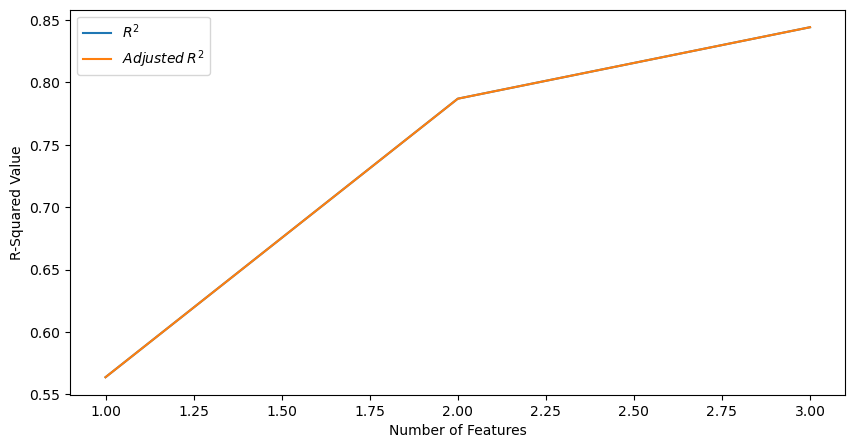

In [70]:
# Range representing the number of features
_range = range(1, len(r2_list1) + 1)

# Create a figure and specify its size
plt.figure(figsize=(10, 5))

# Plot R^2 values
plt.plot(_range, r2_list1, label='$R^2$')

# Plot adjusted R^2 values
plt.plot(_range, adjusted_r2_list1, label='$Adjusted \: R^2$')

# Add labels to the axes
plt.xlabel('Number of Features')
plt.ylabel('R-Squared Value')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [27]:
A = df[["Online boarding", "Type of Travel_Personal Travel", "Inflight wifi service"]]
y= df['satisfaction_satisfied'].values.reshape(-1,1)

In [28]:
model = LogisticRegression()

In [45]:
model.fit(A,y)
score = model.score(A,y)
print('Logistic Regression Model Score :',score)

Logistic Regression Model Score : 0.8476285802279027


C:\Users\bhara\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [44]:
B = df[['Online boarding', 'Type of Travel_Personal Travel', 'Inflight wifi service', 'Gate location', 'Inflight service', 'Customer Type_disloyal Customer', 'Baggage handling', 'Checkin service', 'Class_Eco', 'Class_Eco Plus']]
y= df['satisfaction_satisfied'].values.reshape(-1,1)
model.fit(B,y)
model.score(B,y)
score_r = model.score(B,y)
print('Logistic Regression Model Score :',score_r)

C:\Users\bhara\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic Regression Model Score : 0.8644806744687403


In [ ]:
B = df[['Online boarding', 'Type of Travel_Personal Travel', 'Inflight wifi service', 'Gate location', 'Inflight service', 'Customer Type_disloyal Customer', 'Baggage handling', 'Checkin service', 'Class_Eco', 'Class_Eco Plus']]
y= df['satisfaction_satisfied'].values.reshape(-1,1)
model.fit(B,y)
model.score(B,y)
score_r = model.score(B,y)
print('Logistic Regression Model Score :',score_r)

In [68]:

logreg_model = LogisticRegression()
logreg_model.fit(B_train, y_train)

# Predict test class labels
logreg_pred = logreg_model.predict(B_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, logreg_pred)
print("Logistic Regression Accuracy Score:", accuracy)

# Create a confusion matrix
confusion_mtx_lg = confusion_matrix(y_test, logreg_pred)
print("Confusion Matrix:\n", confusion_mtx_lg)

# Generate a classification report
class_report = classification_report(y_test, logreg_pred)
print("Classification Report:\n", class_report)

C:\Users\bhara\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic Regression Accuracy Score: 0.8648284490640489
Confusion Matrix:
 [[10391  1322]
 [ 1487  7581]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88     11713
           1       0.85      0.84      0.84      9068

    accuracy                           0.86     20781
   macro avg       0.86      0.86      0.86     20781
weighted avg       0.86      0.86      0.86     20781



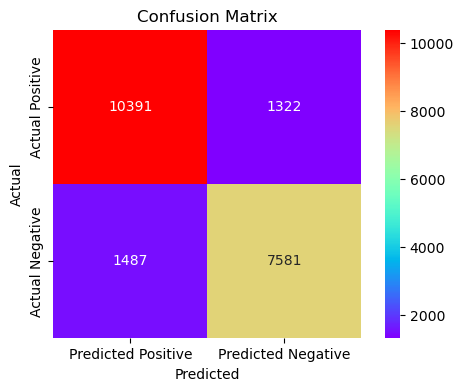

In [47]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_mtx_lg, annot=True, fmt='d', cmap='rainbow', square=True,
            xticklabels=['Predicted Positive','Predicted Negative'],
            yticklabels=['Actual Positive', 'Actual Negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [48]:
# Split the data into training and testing sets
A_train, A_test, y_train, y_test = train_test_split(A, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(A_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(A_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

C:\Users\bhara\AppData\Local\Temp\ipykernel_35460\131611543.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(A_train, y_train)


Accuracy: 0.89
Confusion Matrix:
[[10420  1293]
 [  962  8106]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.90     11713
           1       0.86      0.89      0.88      9068

    accuracy                           0.89     20781
   macro avg       0.89      0.89      0.89     20781
weighted avg       0.89      0.89      0.89     20781



In [49]:
# Split the data into training and testing sets
B_train, B_test, y_train, y_test = train_test_split(B, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(B_train, y_train)

# Make predictions on the test data
rf_pred = rf_classifier.predict(B_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, rf_pred)
conf_matrix_rf = confusion_matrix(y_test, rf_pred)
class_report = classification_report(y_test, rf_pred)



# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix_rf)
print("Classification Report:")
print(class_report)

C:\Users\bhara\AppData\Local\Temp\ipykernel_35460\3480343774.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(B_train, y_train)


Accuracy: 0.96
Confusion Matrix:
[[11326   387]
 [  538  8530]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     11713
           1       0.96      0.94      0.95      9068

    accuracy                           0.96     20781
   macro avg       0.96      0.95      0.95     20781
weighted avg       0.96      0.96      0.96     20781



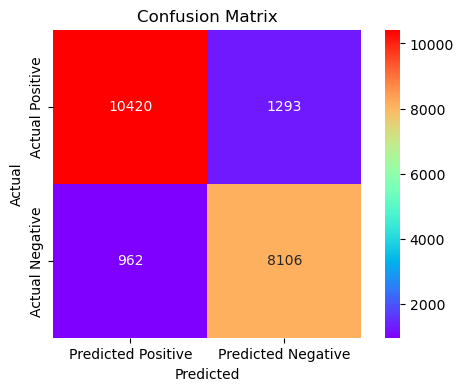

In [50]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='rainbow', square=True,
            xticklabels=['Predicted Positive','Predicted Negative'],
            yticklabels=['Actual Positive', 'Actual Negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [32]:
# Split the data into training and testing sets
B_train, B_test, y_train, y_test = train_test_split(B, y, test_size=0.2, random_state=42)

# # Create an SVM classifier (Support Vector Classifier)
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)

# # Train the classifier on the training data
svm_classifier.fit(B_train, y_train)

# Make predictions on the test data
svm_pred = svm_classifier.predict(B_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, svm_pred)
conf_matrix_svm = confusion_matrix(y_test, svm_pred)
class_report = classification_report(y_test, svm_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix_svm)
print("Classification Report:")
print(class_report)




C:\Users\bhara\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.87
Confusion Matrix:
[[10519  1194]
 [ 1560  7508]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.88     11713
           1       0.86      0.83      0.85      9068

    accuracy                           0.87     20781
   macro avg       0.87      0.86      0.86     20781
weighted avg       0.87      0.87      0.87     20781



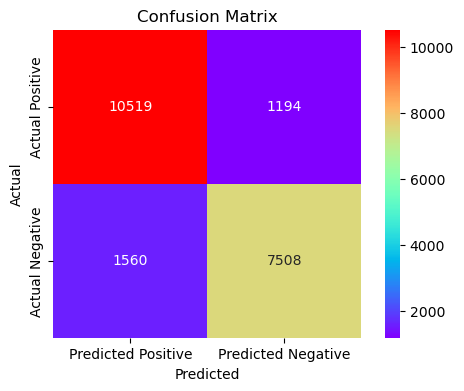

In [51]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='rainbow', square=True,
            xticklabels=['Predicted Positive','Predicted Negative'],
            yticklabels=['Actual Positive', 'Actual Negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [52]:
from sklearn.naive_bayes import GaussianNB
# Create and train a Naive Bayes model (Gaussian Naive Bayes)
nb_model = GaussianNB()
nb_model.fit(B_train, y_train)

# Predict test class labels
nb_pred = nb_model.predict(B_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, nb_pred)
print("Accuracy Score:", accuracy)

# Create a confusion matrix
confusion_mtx_nb = confusion_matrix(y_test, nb_pred)
print("Confusion Matrix:\n", confusion_mtx_nb)

# Generate a classification report
class_report = classification_report(y_test, nb_pred)
print("Classification Report:\n", class_report)

Accuracy Score: 0.8511139983638901
Confusion Matrix:
 [[10196  1517]
 [ 1577  7491]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87     11713
           1       0.83      0.83      0.83      9068

    accuracy                           0.85     20781
   macro avg       0.85      0.85      0.85     20781
weighted avg       0.85      0.85      0.85     20781



C:\Users\bhara\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


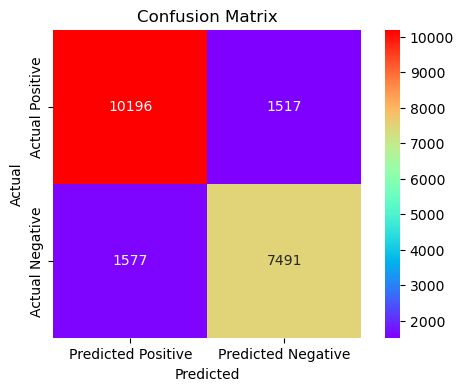

In [53]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_mtx_nb, annot=True, fmt='d', cmap='rainbow', square=True,
            xticklabels=['Predicted Positive','Predicted Negative'],
            yticklabels=['Actual Positive', 'Actual Negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [57]:
# Create a k-NN classifier with k=3 (you can adjust k as needed)

knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Train the classifier on the training data
knn_classifier.fit(B_train, y_train)

# Make predictions on the test data
knn_pred = knn_classifier.predict(B_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, knn_pred)
conf_matrix_knn = confusion_matrix(y_test, knn_pred)
class_report = classification_report(y_test, knn_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix_knn)
print("Classification Report:")
print(class_report)

C:\Users\bhara\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy: 0.94
Confusion Matrix:
[[11171   542]
 [  747  8321]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95     11713
           1       0.94      0.92      0.93      9068

    accuracy                           0.94     20781
   macro avg       0.94      0.94      0.94     20781
weighted avg       0.94      0.94      0.94     20781



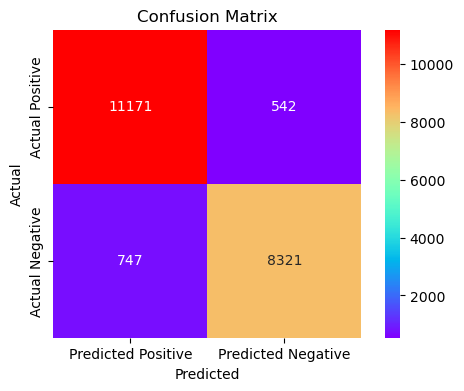

In [58]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='rainbow', square=True,
            xticklabels=['Predicted Positive','Predicted Negative'],
            yticklabels=['Actual Positive', 'Actual Negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [59]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier
decision_tree_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
decision_tree_classifier.fit(B_train, y_train)

# Make predictions on the test data
dt_pred = decision_tree_classifier.predict(B_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, dt_pred)
conf_matrix_dt = confusion_matrix(y_test, dt_pred)
class_report = classification_report(y_test, dt_pred)
decision_tree_classifier.score()
# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix_dt)
print("Classification Report:")
print(class_report)


Accuracy: 0.95
Confusion Matrix:
[[11310   403]
 [  573  8495]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     11713
           1       0.95      0.94      0.95      9068

    accuracy                           0.95     20781
   macro avg       0.95      0.95      0.95     20781
weighted avg       0.95      0.95      0.95     20781



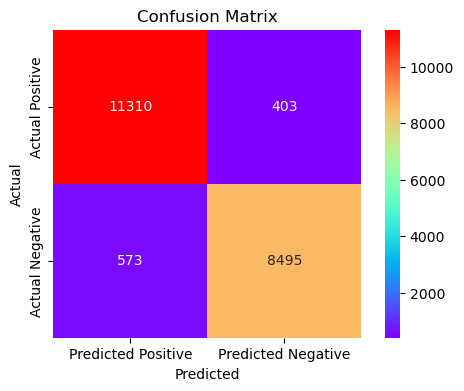

In [61]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='rainbow', square=True,
            xticklabels=['Predicted Positive','Predicted Negative'],
            yticklabels=['Actual Positive', 'Actual Negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

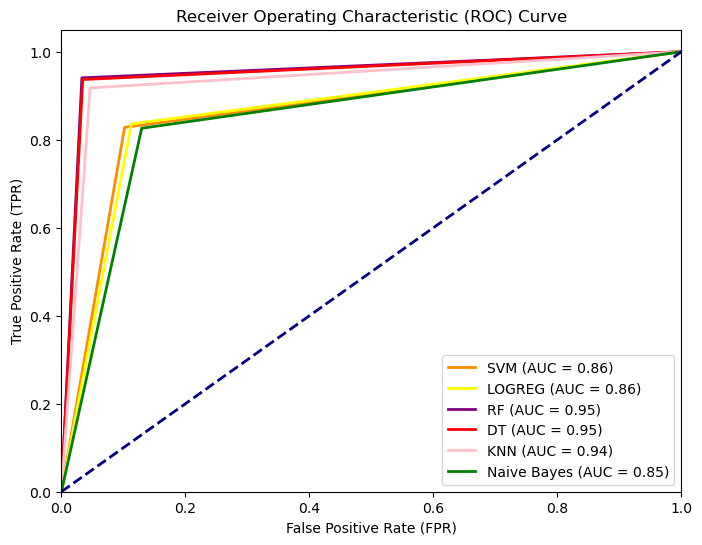

In [62]:
from sklearn.metrics import roc_curve,  roc_auc_score

# SVM
logreg_fpr, logreg_tpr, _ = roc_curve(y_test, logreg_pred)
logreg_auc = roc_auc_score(y_test, logreg_pred)

# SVM
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_pred)
svm_auc = roc_auc_score(y_test, svm_pred)

# RandomForest
rf_classifier_fpr, rf_classifier_tpr, _ = roc_curve(y_test, rf_pred)
rf_classifier_auc = roc_auc_score(y_test, rf_pred)

# DecisionTree
decision_tree_classifier_fpr, decision_tree_classifier_tpr, _ = roc_curve(y_test, dt_pred)
decision_tree_classifier_auc = roc_auc_score(y_test, dt_pred)

# Logistic Regression
knn_classifier_fpr, knn_classifier_tpr, _ = roc_curve(y_test, knn_pred)
knn_classifier_auc = roc_auc_score(y_test, knn_pred)

# Naive Bayes
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_pred)
nb_auc = roc_auc_score(y_test, nb_pred)

plt.figure(figsize=(8, 6))
plt.plot(svm_fpr, svm_tpr, color='darkorange', lw=2, label='SVM (AUC = %0.2f)' % svm_auc)
plt.plot(logreg_fpr, logreg_tpr, color='yellow', lw=2, label='LOGREG (AUC = %0.2f)' % logreg_auc)
plt.plot(rf_classifier_fpr, rf_classifier_tpr, color='purple', lw=2, label='RF (AUC = %0.2f)' % rf_classifier_auc)
plt.plot(decision_tree_classifier_fpr, decision_tree_classifier_tpr, color='red', lw=2, label='DT (AUC = %0.2f)' % decision_tree_classifier_auc)
plt.plot(knn_classifier_fpr, knn_classifier_tpr, color='pink', lw=2, label='KNN (AUC = %0.2f)' % knn_classifier_auc)
plt.plot(nb_fpr, nb_tpr, color='green', lw=2, label='Naive Bayes (AUC = %0.2f)' % nb_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


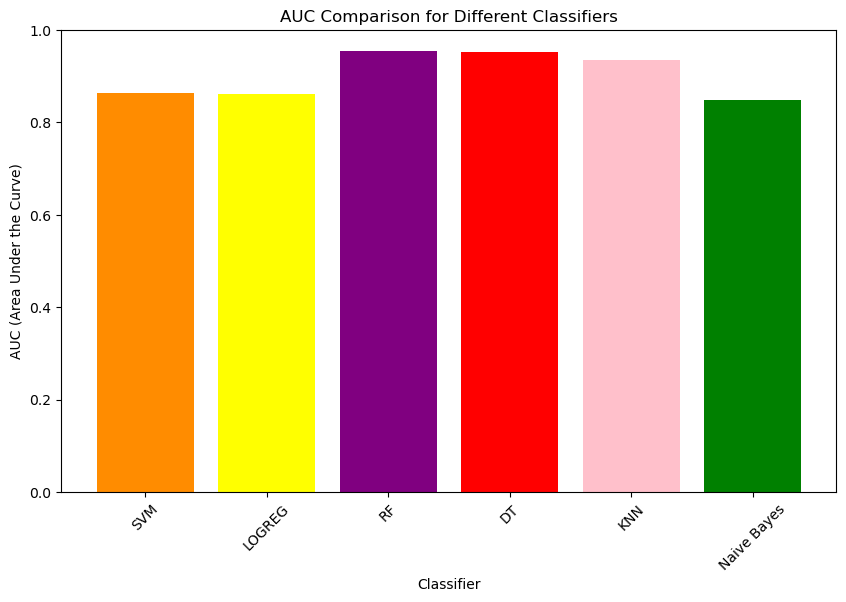

In [63]:
import matplotlib.pyplot as plt

# Assuming you have AUC values for different classifiers
auc_values = [svm_auc, logreg_auc, rf_classifier_auc, decision_tree_classifier_auc, knn_classifier_auc, nb_auc]
classifiers = ['SVM', 'LOGREG', 'RF', 'DT', 'KNN', 'Naive Bayes']

# Create a bar plot for AUC values
plt.figure(figsize=(10, 6))
plt.bar(classifiers, auc_values, color=['darkorange', 'yellow', 'purple', 'red', 'pink', 'green'])
plt.xlabel('Classifier')
plt.ylabel('AUC (Area Under the Curve)')
plt.title('AUC Comparison for Different Classifiers')
plt.ylim(0.0, 1.0)  # Set the y-axis range from 0 to 1
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


C:\Users\bhara\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bhara\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bhara\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bhara\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

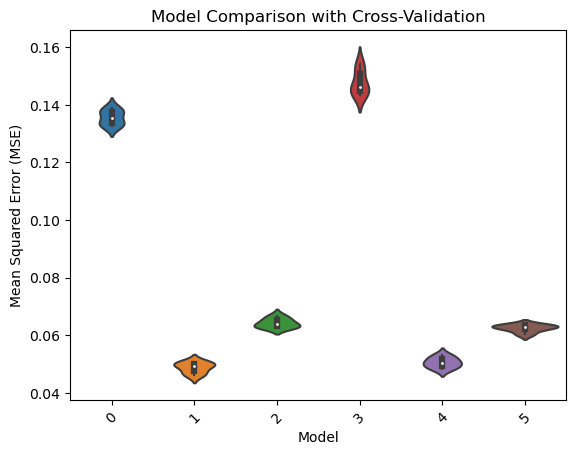

In [67]:
# Create models dictionary
models = {"Logistic Regression": LogisticRegression(), "Random Forest": RandomForestClassifier(), "SVM" : SVC(), "GaussianNB" : GaussianNB(), "DecisionTree Classifier" : DecisionTreeClassifier(), "KNeighbors Classifier" : KNeighborsClassifier()}

results = []

# Loop through the models
for model in models.values():
  
  # Instantiate a KFold object
  kf = KFold(n_splits=6, random_state=12, shuffle=True)
  
  # Perform cross-validation
  cv_results = cross_val_score(model, B_train, y_train, cv=kf, scoring='neg_mean_squared_error')
  mse_results = -cv_results  # Convert negative MSE scores to positive
  results.append(mse_results)

# Create a violin plot to visualize cross-validation results
sns.violinplot(results, labels=models.keys())
plt.title("Model Comparison with Cross-Validation")
plt.xlabel("Model")
plt.ylabel("Mean Squared Error (MSE)")
plt.xticks(rotation=45)
plt.show()

C:\Users\bhara\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bhara\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bhara\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bhara\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

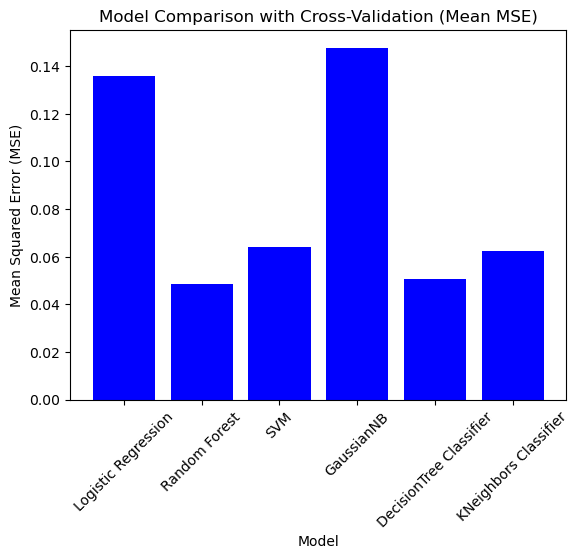

In [66]:
# Create models dictionary
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "GaussianNB": GaussianNB(),
    "DecisionTree Classifier": DecisionTreeClassifier(),
    "KNeighbors Classifier": KNeighborsClassifier()
}

results = []

# Loop through the models
for model in models.values():
    # Instantiate a KFold object
    kf = KFold(n_splits=6, random_state=12, shuffle=True)

    # Perform cross-validation
    cv_results = cross_val_score(model, B_train, y_train, cv=kf, scoring='neg_mean_squared_error')
    mse_results = -cv_results  # Convert negative MSE scores to positive
    results.append(mse_results)

# Calculate the mean or median MSE for each model
mean_mse = [np.mean(result) for result in results]

# Create a bar plot to visualize model comparison
plt.bar(models.keys(), mean_mse, color='blue')
plt.title("Model Comparison with Cross-Validation (Mean MSE)")
plt.xlabel("Model")
plt.ylabel("Mean Squared Error (MSE)")
plt.xticks(rotation=45)
plt.show()
